# Flight Price Prediction

In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Exploration

In [2]:
df = pd.read_csv(r"D:/Obsidian Notes/1. Works/04 Project/1. Personal Project/1.2.2 Data Science Project/1. On Progress/Flight Price Prediction/Jupyter/Cleaned_dataset.csv")
df2 = df.copy()

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [4]:
df2.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [5]:
for i in df.select_dtypes('object').columns:
    print(i)
    print("------")
    print(list(df[i].unique()))

Date_of_journey
------
['2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06']
Journey_day
------
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Airline
------
['SpiceJet', 'Indigo', 'GO FIRST', 'Air India', 'AirAsia', 'Vistara', 'AkasaAir', 'AllianceAir', 'StarAir']
Flight_code
------
['SG-8169', '6E-2519', 'G8-354', 'SG

In [101]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_in_hours,452088.0,12.349222,7.431478,0.75,6.5833,11.3333,16.5,43.5833
Days_left,452088.0,25.627902,14.300846,1.00,13.0000,26.0000,38.0,50.0000
Fare,452088.0,22840.100890,20307.963002,1307.00,8762.7500,13407.0000,35587.0,143019.0000


**Questions that i would answer in this project first :**
1. How data distribution of integer data shaped (including target)?
2. How data distribution of categorical data ? 
3. Is there incorrect data types ? 

### How Numerical Data Distributed (Include Target) ?

In [6]:
# Adjust the notebook cell width (optional)
display(HTML("<style>.container { width:100% !important; }</style>"))

# Calculate the figure size based on the cell width
cell_width = 95  # Adjust this value as needed
figure_width = cell_width / 100 * 15  # 15% of the cell width

plt.rcParams['figure.figsize'] = figure_width, 4
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'


numericals = df2.select_dtypes(['int64', 'float64']).columns

def numerical_plotting(plot, data, numericals):
    fig, axes = plt.subplots(1, len(numericals))    
    for i, numerical in enumerate(numericals):
        ax = axes[i]
        if plot == 'box':
            sns.boxplot(y=data[numerical], color='#f5b932ff', orient='v', showfliers=True, ax=ax)
            ax.set_title(f'Boxplot of {numerical}')
        elif plot == 'hist':
            sns.histplot(data[numerical], color='#f5b932ff', kde=True, ax=ax)
            ax.set_title(f'Distribution of {numerical}')
        elif plot == 'violin':
            sns.violinplot(y=data[numerical], color='#f5b932ff', orient='v', ax=ax)
            ax.set_title(f'Violinplot of {numerical}')
    
    plt.tight_layout()
    plt.show()

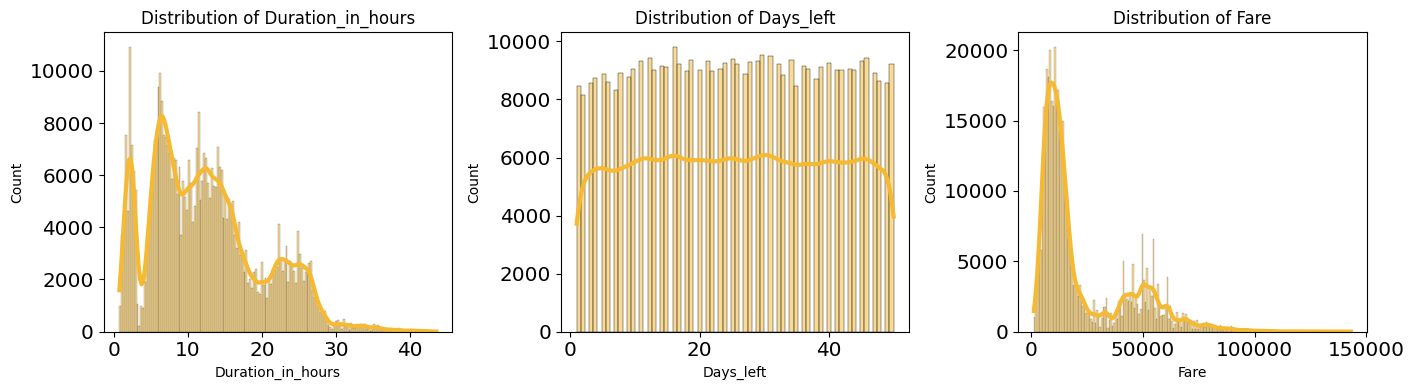

In [103]:
numerical_plotting('hist', df2, numericals)

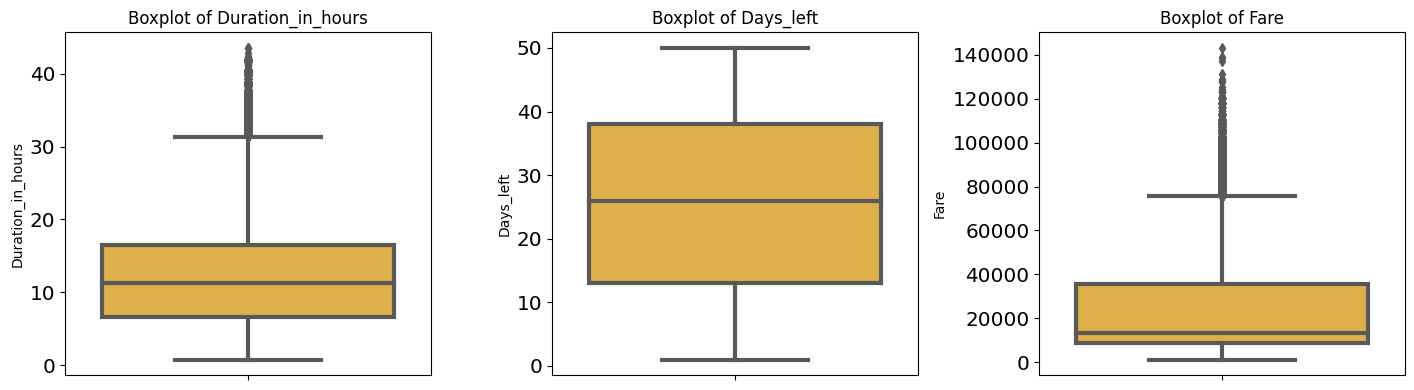

In [104]:
numerical_plotting('box', df2, numericals)

### How Categorical Data Distributed ?

In [105]:
df2.describe(include='object').T

,count,unique,top,freq
Date_of_journey,452088,50,2023-01-31,9824
Journey_day,452088,7,Monday,72220
Airline,452088,9,Vistara,231490
Flight_code,452088,1405,UK-936,5506
Class,452088,4,Economy,252033
Source,452088,7,Delhi,83153
Departure,452088,4,6 AM - 12 PM,184980
Total_stops,452088,3,1-stop,369650
Arrival,452088,4,After 6 PM,200266
Destination,452088,7,Mumbai,82995


### Is There Incorrect Data Types ?

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [107]:
df2.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


**Incorrect Data Types**
- Date_of_journey, need to be converted into Datetime data
- Except above, all the columns have correct data types 

### Is There Any Missing & Duplicated Values

In [108]:
df2.isnull().sum().sum()

0

In [109]:
df2.duplicated().sum()

6722

## 2. Exploratory Data Analysis
**Several aspects that i should detect first** : </br>
1. (Add external data 'Special / Holiday') is special / holiday data really influence ticket price ? 
2. Analyzing the ticket price difference between feature : 
	- Is there significant difference between price with airline ?
	- Is there significant difference between price with Class ?
	- Are lower total number of stops means higher the price or vice versa ? 
	- Is there significant difference between price with Destination ?
	- How the ticket price vary based on the substract of booking date with trip date ? 

### How Data Looked Like 

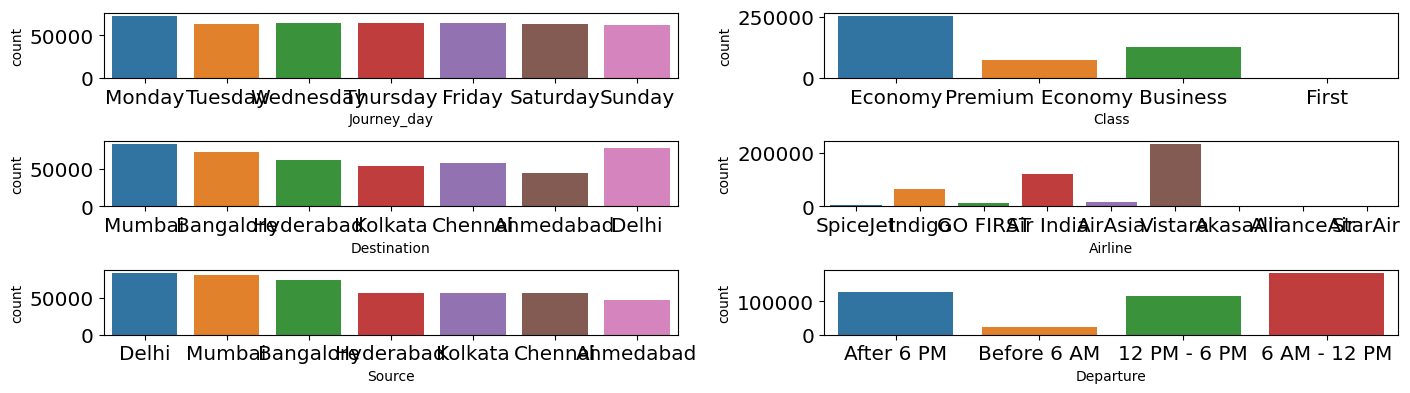

In [110]:
def create_plot(feature, x, y):
    if(df2[feature].dtype == 'object'):
        sns.countplot(x= df2[feature], ax = axes[x, y])
    elif(df2[feature].dtype == 'int64'):
        sns.histplot(x= df2[feature], ax = axes[x, y])
    else :
        sns.histplot(x= df2[feature], ax = axes[x, y])
 

fig, axes = plt.subplots(3, 2)    
create_plot('Journey_day', 0, 0)
create_plot('Class', 0, 1)
create_plot('Destination', 1, 0)
create_plot('Airline', 1, 1)
create_plot('Source', 2, 0)
create_plot('Departure', 2, 1)

plt.tight_layout()
plt.show()

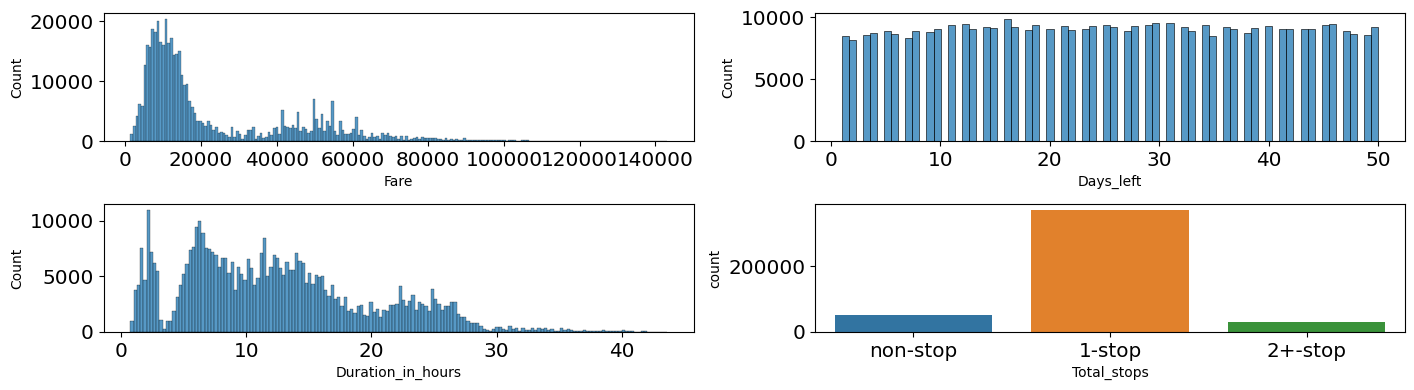

In [111]:
fig, axes = plt.subplots(2, 2)    
create_plot('Fare', 0, 0)
create_plot('Days_left', 0, 1)
create_plot('Duration_in_hours', 1, 0)
create_plot('Total_stops', 1, 1)

plt.tight_layout()
plt.show()

### Is there difference between price with airlines & class

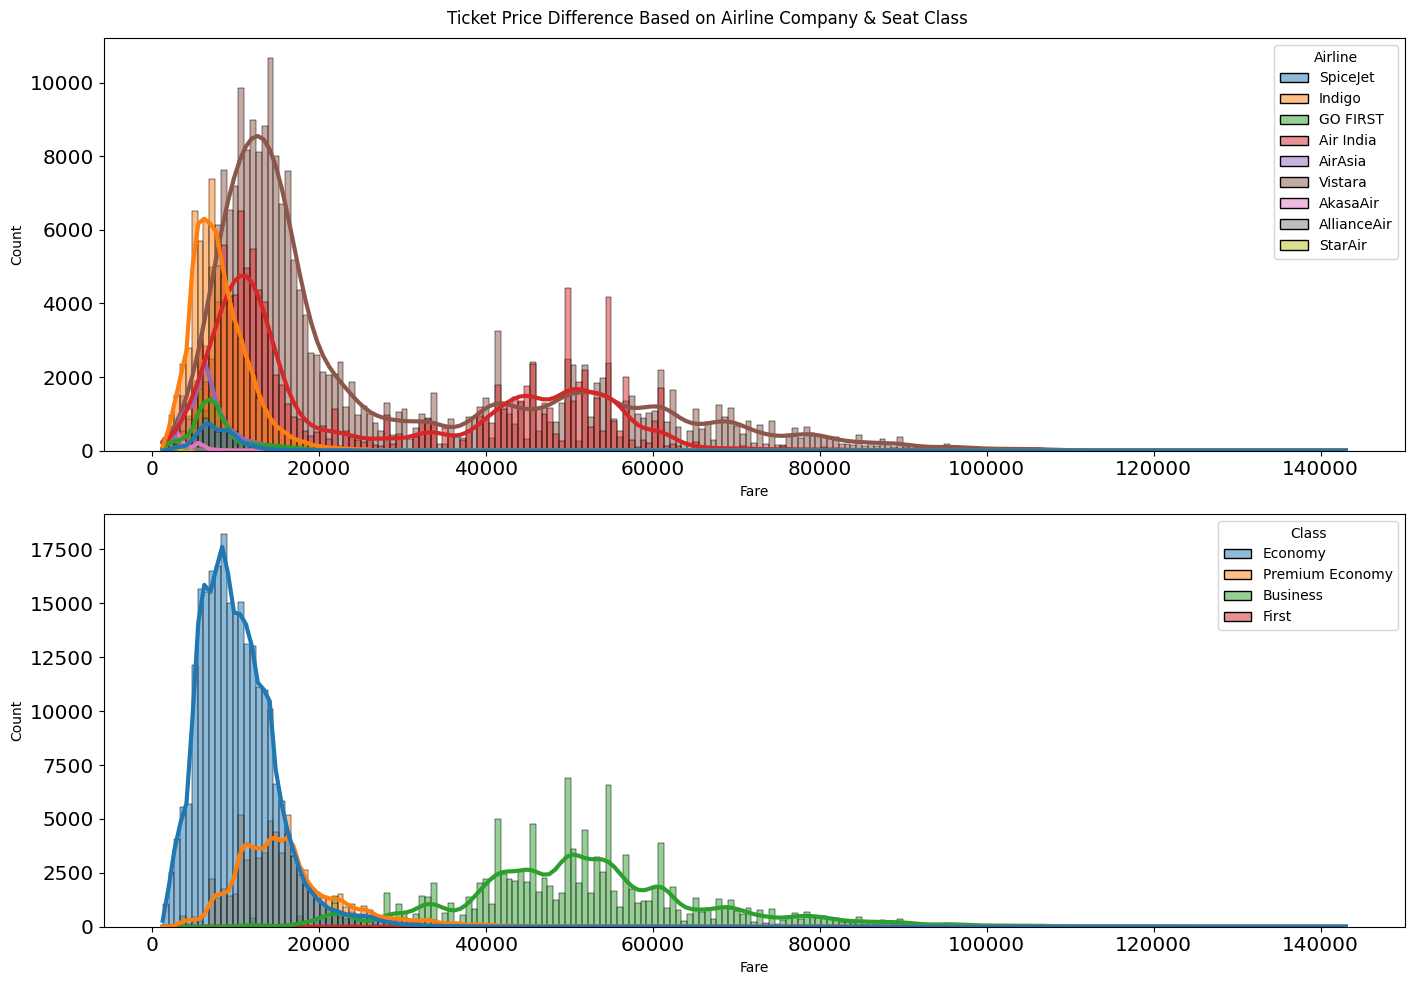

In [112]:
# difference between price with airlines & seat class
fig, axes = plt.subplots(2, figsize = (figure_width, 10))
plt.suptitle('Ticket Price Difference Based on Airline Company & Seat Class')

axes1 = sns.histplot(data = df2, x = 'Fare', ax = axes[0], hue = 'Airline', kde= True)
axes2 = sns.histplot(data = df2, x = 'Fare', ax = axes[1], hue = 'Class', kde= True)

plt.tight_layout()
plt.show()

### Are Lower Number of Stops Means Higher Ticket Price 

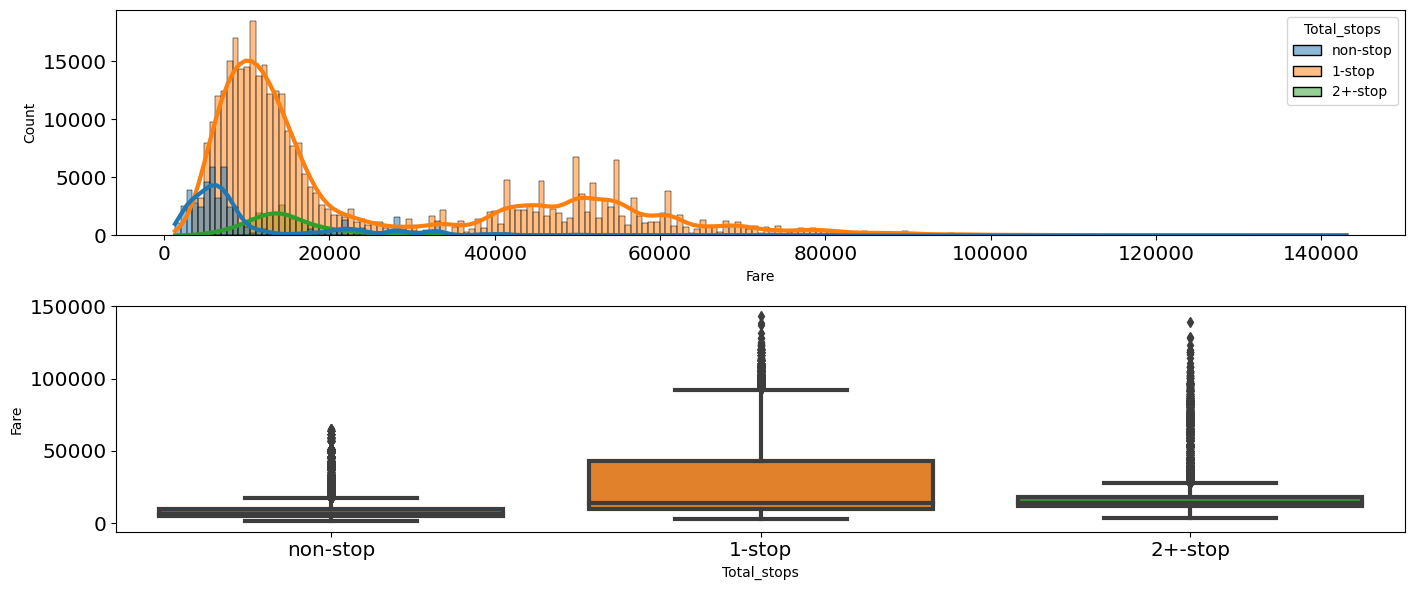

In [113]:
# investigate whether of number of stops influence ticket price
fig, axes = plt.subplots(2, figsize = (figure_width, 6))

axes1 = sns.histplot(data = df2, x = 'Fare', hue = 'Total_stops', ax = axes[0], kde = True)
axes2 = sns.boxplot(data = df2, y = 'Fare', x = 'Total_stops', ax = axes[1])

plt.tight_layout()
plt.show()

### Which Trips That Gives Higher Price ?

In [114]:
# Generate new feature : Journey as a value indicate city a person departure and city a person arrive
df2['Journey'] = df2['Source'] + "-" + df2['Destination']
mean_fare_by_journey = df2[['Fare', 'Journey']].groupby('Journey').mean().reset_index()
mean_fare_by_journey.sort_values(by = 'Fare', ascending=False )

,Journey,Fare
35,Kolkata-Mumbai,26997.850475
5,Ahmedabad-Mumbai,26392.751070
41,Mumbai-Kolkata,26183.432313
10,Bangalore-Kolkata,26141.406027
31,Kolkata-Bangalore,26044.081818
38,Mumbai-Chennai,26022.054289
11,Bangalore-Mumbai,25849.356428
37,Mumbai-Bangalore,25497.985399
32,Kolkata-Chennai,25428.018603
30,Kolkata-Ahmedabad,24926.064705


In [115]:
df2.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,Delhi-Mumbai
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,Delhi-Mumbai
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,Delhi-Mumbai
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,Delhi-Mumbai
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,Delhi-Mumbai


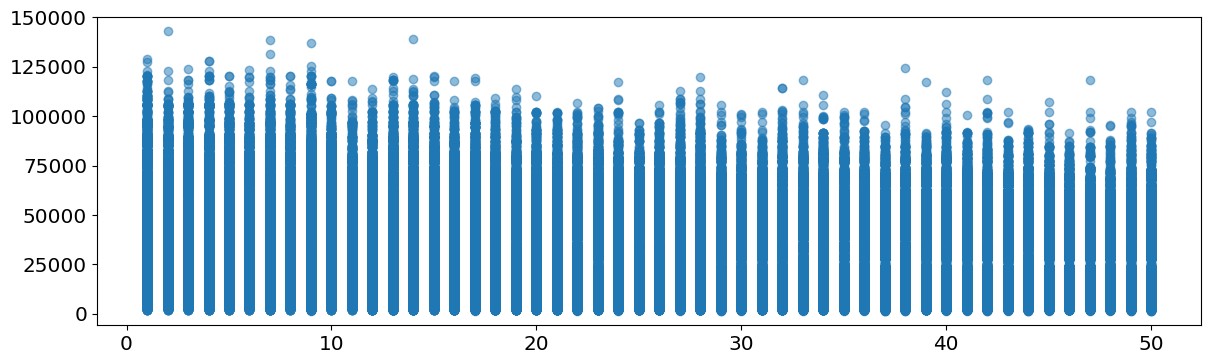

In [116]:
plt.scatter(data = df2, x = 'Days_left', y = 'Fare', alpha = 0.5)

### Any Feature Intercorrelated 

C:\Users\user\AppData\Local\Temp\ipykernel_3968\3765241396.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot = True)


<AxesSubplot: >

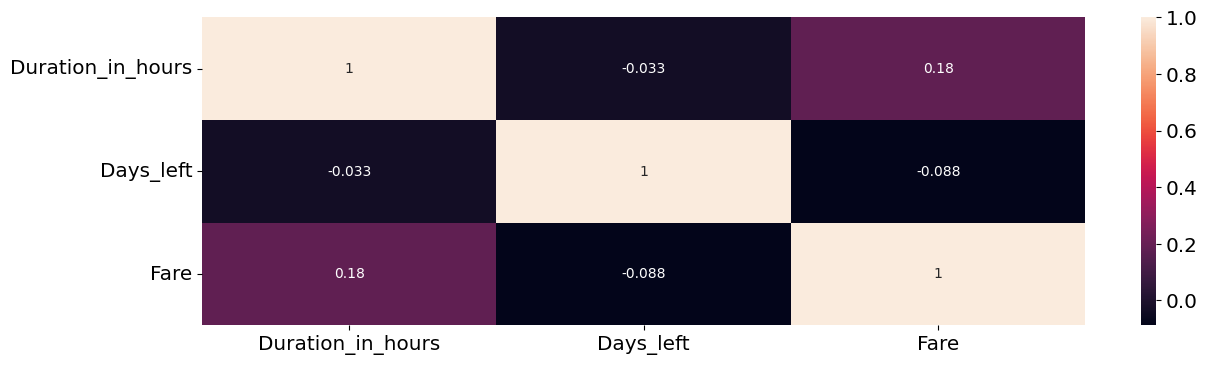

In [118]:
sns.heatmap(df2.corr(), annot = True)

### Conclusion

## 3. Data Cleansing & Data Preprocessing

### Handle Missing Values 

Since there isn't missing values, so we are not performing any missing values treatment

### Handle Duplicated Values

In [7]:
# Remove Duplicated values
df_cleaned = df2.copy()
df_cleaned = df_cleaned.drop_duplicates(keep = 'first')
print(f'Rows Before Remove Duplicates : {len(df2)}')
print(f'Rows After Remove Duplicates : {len(df_cleaned)}')
print(f'Rows Cleaned : {len(df2) - len(df_cleaned)}')

Rows Before Remove Duplicates : 452088
Rows After Remove Duplicates : 445366
Rows Cleaned : 6722


### Handle Outliers

### Handle Skewed Data

### Generate New Features 

In [120]:
6722 / 452088

0.014868786607917043

### Feature Scaling & Feature Encoding

### Train & Test Splitting